<a href="https://colab.research.google.com/github/IronZiiz/computing_physics_methods/blob/main/HW_integracao_numerica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarefa-2 Integração numérica

Nesta tarefa faremos uma comparação entre os 4 método de integração numérica discutidas em aula: Trapézio, Simpson, fixed_quad  e quad para a integral de exp(-x)

1 Crie uma nova versão dos integradores (funções) trapézio e simpson criadas em sala, trocando a função np.sum() por um loop 'for' no indice do array

2.Faça um gráfico do tempo de integração versus o numero de pontos (10000), comparando os 4 integradores criados por você mesmo

3.Faça um gráfico do erro absoluto(|valor analítico - valor numérico|) versus numero de pontos (10000) comparando Trapezio, Simpson, fixed_quad e quad

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid, simpson
from scipy.integrate import quad
from scipy.integrate import fixed_quad
import time

## Definindo a função e⁻x
Aqui definiremos a função que será integrada pelos métodos de integração ao longo do nootebook bem como o lim

In [3]:
def f(x):
  return np.exp(-x)

# intervalo de integração
a,b = 0, 10
n = 10


## 1. Trocando np.sum por um loop for


### Trapézio

In [4]:
h = (b-a)/n

x = np.linspace(a, b, n+1)
y = f(x)

def trapezoid(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    integral = 0
    for i in range(n):
        integral += h*(y[i] + y[i+1])/2
    return integral

result_trapezoid  = trapezoid(f, a, b, n)



In [5]:
result_trapezoid

np.float64(1.0819275852028303)

### Simpson

In [6]:
def simpson(f, a, b, n):
  if n%2 == 1:
    n+=1 # should be pair
  h = (b-a)/n
  x = np.linspace(a, b, n+1)
  y = f(x)

  # extremos
  integral = y[0] + y[-1]

  # parte da integral para termos pares
  for i in range(1, n, 2):
        integral += 4 * y[i]
  # parte da integral para termos impares
  for i in range(2, n-1, 2):
        integral += 2 * y[i]

  integral *= h / 3

  return integral



In [7]:
result_simpson = simpson(f, a, b, n)


## 2. gráfico do tempo de integração versus o numero de pontos (10000)

In [8]:
# definindo o numero de pontos
n = 10000

### Trapézio

In [9]:
inicio = time.time()
trapezoid(f, a, b, n)
fim = time.time()
tempo_trap = fim - inicio
print(f"Tempo de execução do método dos trapézios: {tempo_trap} segundos")

Tempo de execução do método dos trapézios: 0.08262395858764648 segundos


### Simpson

In [10]:
inicio = time.time()
simpson(f, a, b, n)
fim = time.time()
tempo_simp = fim - inicio
print(f"Tempo de execução do método de Simpson: {tempo_simp} segundos")

Tempo de execução do método de Simpson: 0.029270172119140625 segundos


### Quad

In [11]:
inicio = time.time()
res_quad,err = quad(f,a, b)
print("Quadratura gaussiana:", res_quad)
fim = time.time()
tempo_quad = fim - inicio
print(f"Tempo de execução do método da quadratura gaussiana: {tempo_quad} segundos")

Quadratura gaussiana: 0.9999546000702375
Tempo de execução do método da quadratura gaussiana: 0.007021903991699219 segundos


### Fixed Quad

In [12]:
inicio = time.time()
res_fix_quad,err = fixed_quad(f,a, b)
print("Quadratura gaussiana:", res_quad)
fim = time.time()
tempo_fixed = fim - inicio
print(f"Tempo de execução do método da quadratura gaussiana: {tempo_fixed} segundos")

Quadratura gaussiana: 0.9999546000702375
Tempo de execução do método da quadratura gaussiana: 0.03969264030456543 segundos


### Gráfico de tempo de integração versus numero de pontos




In [22]:
# Range de numero de pontos analisado.
n_values = np.arange(10, 10001,20)

# Listas para armazenar os tempos
times_trapezoid = []
times_simpson = []
times_quad = []
times_fixed_quad = []

# Medição do tempo para cada método
for n in n_values:
    # Trapezoid
    start = time.time()
    trapezoid(f, a, b, n)
    times_trapezoid.append(time.time() - start)

    # Simpson
    start = time.time()
    simpson(f, a, b, n)
    times_simpson.append(time.time() - start)

    # Quad (adaptativo, não depende de n diretamente, mas usamos para comparação)
    start = time.time()
    quad(f, a, b)
    times_quad.append(time.time() - start)

    # Fixed_quad (fixo, usa n como ordem da quadratura)
    start = time.time()
    fixed_quad(f, a, b)
    times_fixed_quad.append(time.time() - start)



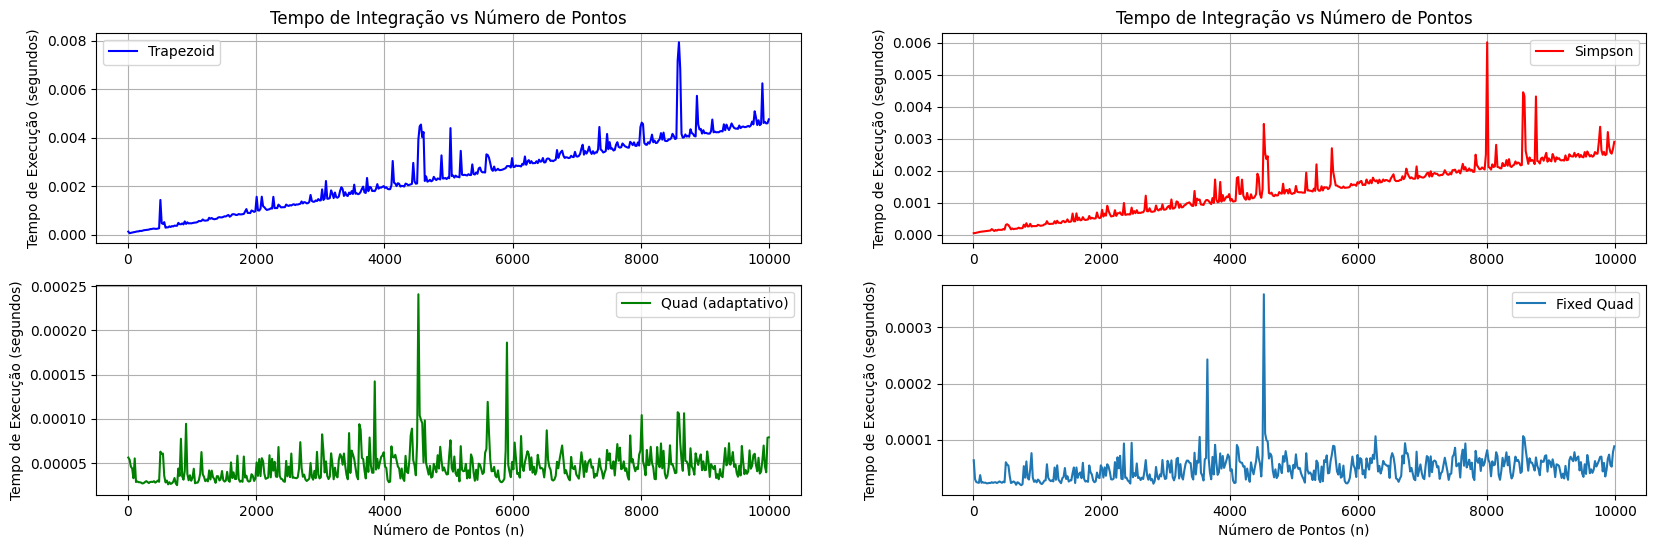

In [23]:
# Plotando os resultados
plt.figure(figsize=(20, 6))

plt.subplot(2, 2, 1)
plt.plot(n_values,times_trapezoid,color='b', linestyle='-', label="Trapezoid")
plt.ylabel("Tempo de Execução (segundos)")
plt.title("Tempo de Integração vs Número de Pontos")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(n_values, times_simpson,color='r', linestyle='-', label="Simpson")
plt.ylabel("Tempo de Execução (segundos)")
plt.title("Tempo de Integração vs Número de Pontos")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(n_values, times_quad,color='g', linestyle='-', label="Quad (adaptativo)")
plt.xlabel("Número de Pontos (n)")
plt.ylabel("Tempo de Execução (segundos)")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(n_values, times_fixed_quad, label="Fixed Quad")
plt.xlabel("Número de Pontos (n)")
plt.ylabel("Tempo de Execução (segundos)")
plt.legend()
plt.grid(True)



plt.show()

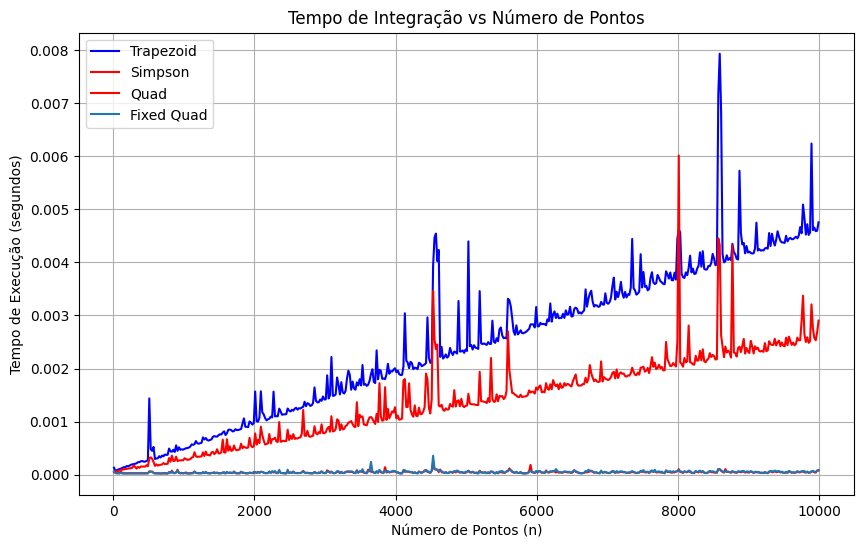

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(n_values, times_trapezoid, color='blue', linestyle='-', label="Trapezoid")
plt.plot(n_values, times_simpson, color='red', linestyle='-',label="Simpson")
plt.plot(n_values, times_quad, color='red', linestyle='-',label="Quad")
plt.plot(n_values, times_fixed_quad, linestyle='-',label="Fixed Quad")

plt.xlabel("Número de Pontos (n)")
plt.ylabel("Tempo de Execução (segundos)")
plt.title("Tempo de Integração vs Número de Pontos")
plt.legend()
plt.grid(True)
plt.show()

##3. gráfico do erro absoluto(|valor analítico - valor numérico|)

In [25]:
# Valor analítico da integral de exp(-x) de 0 a 10
analytical_value = 1 - np.exp(-10)


errors_trapezoid = []
errors_simpson = []
errors_fixed_quad = []
errors_quad = []

# Loop para calcular o erro para diferentes números de pontos
for n in range(1, n + 1):
    # Método do Trapézio
    result_trapezoid = trapezoid(f, a, b, n)
    errors_trapezoid.append(abs(analytical_value - result_trapezoid))

    # Método de Simpson
    result_simpson = simpson(f, a, b, n)
    errors_simpson.append(abs(analytical_value - result_simpson))

    # Método fixed_quad
    result_fixed_quad, _ = fixed_quad(f, 0, 10)
    errors_fixed_quad.append(abs(analytical_value - result_fixed_quad))

    # Método quad
    result_quad, _ = quad(f, 0, 10)
    errors_quad.append(abs(analytical_value - result_quad))




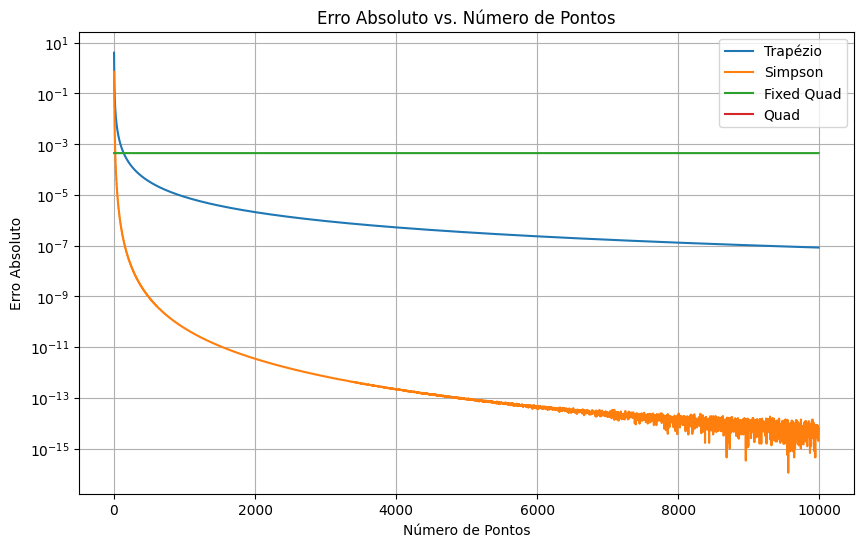

In [26]:
# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(range(1, n + 1), errors_trapezoid, label='Trapézio')
plt.plot(range(1, n + 1), errors_simpson, label='Simpson')
plt.plot(range(1, n + 1), errors_fixed_quad, label='Fixed Quad')
plt.plot(range(1, n + 1), errors_quad, label='Quad')

plt.xlabel('Número de Pontos')
plt.ylabel('Erro Absoluto')
plt.title('Erro Absoluto vs. Número de Pontos')
plt.legend()
plt.grid(True)
plt.yscale('log') # escala logarítmica para melhor visualização
plt.show()